# Initial Data Analysis ....  
### Using Pandas  

- As see also [Data Cleaning](./Data%20Cleaning.ipynb)  


In [3]:
# Part 0 - the basics
import pandas as pd

# Demo 1 Pivot Table in Jupyter
from pivottablejs import pivot_ui

# Demo 2 Pandas Profiling Reports
import pandas_profiling


# Complex
import json

# Complex - Spark
# https://adatis.co.uk/parsing-nested-json-lists-in-databricks-using-python/
import findspark
import pyspark
from pyspark.sql.functions import explode, col
# above also require Spark to be installed ....

# Charting & Data cleaning
# https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure



# Demo 3  Great Expectations
# https://changhsinlee.com/python-great-expectations/
import great_expectations as ge

#Other ... 
# from pydqc.data_summary import distribution_summary_pretty
# https://towardsdatascience.com/introducing-pydqc-7f23d04076b3




In [4]:
# STANDARD IMPORTS  
from datetime import datetime
import glob
import json
import math
import io
import os
import csv
from flatten_json import flatten
import operator
from collections import Counter

# Upgraded Pandas
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt

# AWS
import boto3


#### Get Some Data  
- pandas supports many ways to get it

In [30]:
# just hardcode using dictionary  
df = pd.DataFrame({'col1':[100,200],'col2':["a","b"]})
df

,col1,col2
0,100,a
1,200,b


In [34]:
# random - column names provided for second parameter of rand
df = pd.DataFrame(np.random.rand(2,3),columns=['a','b','c'])
df

,a,b,c
0,0.596478,0.337964,0.324302
1,0.934052,0.711292,0.009832


In [35]:
# rename columns
df.columns = ['column_a','column_b','column_c']
df

,column_a,column_b,column_c
0,0.596478,0.337964,0.324302
1,0.934052,0.711292,0.009832


In [36]:
# rename using code
df.columns = df.columns.str.replace('column_','new_col_name_')
df

# or use df.add_prefix or df.add_suffix

,new_col_name_a,new_col_name_b,new_col_name_c
0,0.596478,0.337964,0.324302
1,0.934052,0.711292,0.009832


In [42]:
# simplest - just from a csv local  
local1 = './data/titanic/train.csv'
df = pd.read_csv(local1)

In [4]:
# or from an AWS S3 .... (need to have your credentials saved in ~/.aws)  

s3_bucket = None 
s3_object = None
local_file = None


if not s3_bucket and s3_object:
    s3 = boto3.resource('s3')

    # Assume files are in S3 bucket - source!
    SourceBucket = s3_bucket
    # Download to with 'rawData' folder. 
    downloadFolder = './rawData'
    if not os.path.exists(downloadFolder):
        os.makedirs(downloadFolder)
    downloadFolder = downloadFolder + '/'

    # The Data
    s3file1 = s3_object
    local1 = local_file

    # Downloading files if not already.
    if not os.path.isfile(downloadFolder + local1):
        s3.Bucket(SourceBucket).download_file(s3file1, downloadFolder + local1) 

    #create dataframes
    df = pd.read_csv(downloadFolder + local1, header=0, sep=',', quotechar='"', encoding = "utf-8")


In [46]:
# Or just direct from HTTPS source ...
url = None  # "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
local1 = 'countries.csv'  # just for documentation
if url:
    df=pd.read_csv(url)


## Part 0 - Basics

In [1]:
#Standard pandas settings  
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None
pd.set_option('mode.chained_assignment', None) # disable the SettingwithCopyWarning

np.set_printoptions(threshold=sys.maxsize)  # if values like unique are in numpy.ndarray

NameError: name 'pd' is not defined

In [36]:
# see the default pandas charts in notebook  
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

NameError: name 'matplotlib' is not defined

In [44]:
# good step - include some meta data in the dataframe
df.name = local1
df['fileName'] = local1

In [45]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fileName
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S,./data/titanic/train.csv
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S,./data/titanic/train.csv
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S,./data/titanic/train.csv
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q,./data/titanic/train.csv
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S,./data/titanic/train.csv


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  fileName     891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'fileName'],
      dtype='object')

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
fileName        object
dtype: object

In [1]:
#reverse order
df.loc[::-1].head(5)

NameError: name 'df' is not defined

### 0.1 - Simple Excel Like features  

In [14]:
# Cross tab
pd.crosstab(index = df['Pclass'], columns = df['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [17]:
# Cross tab
pd.crosstab(index = df['Pclass'], columns = df['Sex'], values = df['Fare'], aggfunc = 'mean')

Sex,female,male
Pclass,,
1,106.125798,67.226127
2,21.970121,19.741782
3,16.118810,12.661633


In [22]:
# Quartiles
# pd.qcut(x = df['Age'], q = 4, labels = [1,2,3,4])

In [22]:
# Color Maps - first 10 rows
excel = df.head(5).style.background_gradient(subset=["Age"], cmap = "YlGnBu")
excel

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fileName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S,countries.csv
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C,countries.csv
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S,countries.csv
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S,countries.csv
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S,countries.csv
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q,countries.csv
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S,countries.csv
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S,countries.csv
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S,countries.csv
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C,countries.csv


In [21]:
# data bars - first 10 rows
excel = df.head(5).style.bar(subset=["Age"], color = "#50C878")
excel

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fileName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S,countries.csv
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C,countries.csv
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S,countries.csv
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S,countries.csv
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S,countries.csv
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q,countries.csv
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S,countries.csv
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S,countries.csv
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S,countries.csv
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C,countries.csv


### 0.1 - Agregations

In [24]:
# Simple
filter_column = "Sex"
filter_value = "female"
sum_column = "Fare"

total = df.loc[df[filter_column] == filter_value, sum_column].sum()
print("Total ", sum_column, " where ", filter_column, " = ", filter_value, " is: ", str(total))

Total  Fare  where  Sex  =  female  is:  13966.6628


In [23]:
# Define summary aggregations as a template

# assumes you used the titanic dataframe .... 
aggregations = {'PassengerId':['count','nunique'],'Sex':['count','nunique'], 'Fare' : ['min', 'mean', 'max'], 'Age' : ['min', 'mean', 'max']}


In [24]:
# this does initial, and then creates "total" using the fileName column
df_summary = df.groupby(['Pclass']).agg(aggregations)
df_summary = df_summary.append(df.groupby(['fileName']).agg(aggregations))
df_summary

PassengerId           Sex         Fare                       \
                    count nunique count nunique  min       mean       max   
1                     216     216   216       2  0.0  84.154687  512.3292   
2                     184     184   184       2  0.0  20.662183   73.5000   
3                     491     491   491       2  0.0  13.675550   69.5500   
countries.csv         891     891   891       2  0.0  32.204208  512.3292   

                Age                   
                min       mean   max  
1              0.92  38.233441  80.0  
2              0.67  29.877630  70.0  
3              0.42  25.140620  74.0  
countries.csv  0.42  29.699118  80.0

### 0.2 - Basic Plotting  
- built into pandas  

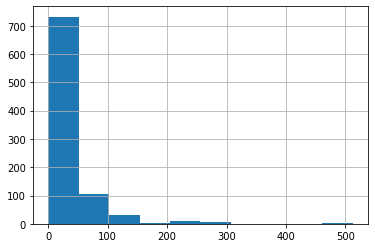

In [18]:
df['Fare'].hist()

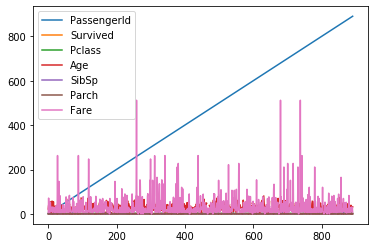

In [25]:
df.plot()

## Part 2 - Pivot Table  
This is not excel - but VERY handy  
- just drag and drop  
- and simple charts, heat maps, etc  

In [26]:
pivot_ui(df)

In [27]:
# data science - creating categorial variables - denomalize
class_dummies = pd.get_dummies(df['Pclass'])
class_dummies.head(3)

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1


In [29]:
# now add to orignal dataframe
pd.concat(objs = [df['Pclass'], class_dummies], axis = 1).head(5)

,Pclass,1,2,3
0,3,0,0,1
1,1,1,0,0
2,3,0,0,1
3,1,1,0,0
4,3,0,0,1


## Part 3 - Profiling  
- create way to save results when archiving data after analysis  

In [34]:
pandas_profiling.ProfileReport(df)
# can also send to file as html
# .to_file(local1 + "_profile.html")

TypeError: concat() got an unexpected keyword argument 'join_axes'

### Part 3 Complex Structures  
- if nested objects or lists, you can use pandas to flatten
- see: https://www.kaggle.com/jboysen/quick-tutorial-flatten-nested-json-in-pandas/notebook

In [16]:
#load new json object - which has 2 complex columns
with open('./data/raw_nyc_phil.json') as f:
    d = json.load(f)
# load dataframe parent node  'programs'
nycphil = pd.json_normalize(d['programs'])
nycphil.head(3)

,season,orchestra,concerts,programID,works,id
0,1842-43,New York Philharmonic,"[{'Date': '1842-12-07T05:00:00Z', 'eventType':...",3853,"[{'workTitle': 'SYMPHONY NO. 5 IN C MINOR, OP....",38e072a7-8fc9-4f9a-8eac-3957905c0002
1,1842-43,New York Philharmonic,"[{'Date': '1843-02-18T05:00:00Z', 'eventType':...",5178,[{'workTitle': 'SYMPHONY NO. 3 IN E FLAT MAJOR...,c7b2b95c-5e0b-431c-a340-5b37fc860b34
2,1842-43,Musicians from the New York Philharmonic,"[{'Date': '1843-04-07T05:00:00Z', 'eventType':...",10785,"[{'workTitle': 'EGMONT, OP.84', 'composerName'...",894e1a52-1ae5-4fa7-aec0-b99997555a37


In [17]:
nycphil.columns

Index(['season', 'orchestra', 'concerts', 'programID', 'works', 'id'], dtype='object')

In [18]:
# split out the works column.  the "meta" identifies the parent columns to include in new DF
works_data = pd.json_normalize(data=d['programs'], record_path='works', 
                            meta=['id', 'orchestra','programID', 'season'],errors='ignore')
works_data.head(3)

,workTitle,conductorName,ID,soloists,composerName,movement,interval,movement.em,movement._,id,orchestra,programID,season
0,"SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",52446*,[],"Beethoven, Ludwig van",NaN,NaN,NaN,NaN,38e072a7-8fc9-4f9a-8eac-3957905c0002,New York Philharmonic,3853,1842-43
1,OBERON,"Timm, Henry C.",8834*4,"[{'soloistName': 'Otto, Antoinette', 'soloistR...","Weber, Carl Maria Von","""Ozean, du Ungeheuer"" (Ocean, thou mighty mons...",NaN,NaN,NaN,38e072a7-8fc9-4f9a-8eac-3957905c0002,New York Philharmonic,3853,1842-43
2,"QUINTET, PIANO, D MINOR, OP. 74",NaN,3642*,"[{'soloistName': 'Scharfenberg, William', 'sol...","Hummel, Johann",NaN,NaN,NaN,NaN,38e072a7-8fc9-4f9a-8eac-3957905c0002,New York Philharmonic,3853,1842-43


In [19]:
# spit out the soloists - which is also another list - under works
soloist_data = pd.json_normalize(data=d['programs'], record_path=['works', 'soloists'], 
                              meta=['id'],errors='ignore')
soloist_data.head(3)

,soloistName,soloistRoles,soloistInstrument,id
0,"Otto, Antoinette",S,Soprano,38e072a7-8fc9-4f9a-8eac-3957905c0002
1,"Scharfenberg, William",A,Piano,38e072a7-8fc9-4f9a-8eac-3957905c0002
2,"Hill, Ureli Corelli",A,Violin,38e072a7-8fc9-4f9a-8eac-3957905c0002


## Complex - with Spark

In [23]:
source_json = """
{
    "persons": [
        {
            "name": "John",
            "age": 30,
            "cars": [
                {
                    "name": "Ford",
                    "models": [
                        "Fiesta",
                        "Focus",
                        "Mustang"
                    ]
                },
                {
                    "name": "BMW",
                    "models": [
                        "320",
                        "X3",
                        "X5"
                    ]
                }
            ]
        },
        {
            "name": "Peter",
            "age": 46,
            "cars": [
                {
                    "name": "Huyndai",
                    "models": [
                        "i10",
                        "i30"
                    ]
                },
                {
                    "name": "Mercedes",
                    "models": [
                        "E320",
                        "E63 AMG"
                    ]
                }
            ]
        }
    ]
}
"""

In [30]:
#save example
with open('./data/comlex_structure.json', 'w') as f:
    f.write(source_json)

In [35]:
#findspark.init()
## NEED SPARK - NOT INSTALLED

## Data Cleaning

In [42]:
# DATA from Kaggle - https://www.kaggle.com/c/sberbank-russian-housing-market/data
# read the data
df = pd.read_csv('./data/sberbank.csv')

# shape and data types of the data
print('shape',df.shape)
print('dtypes',df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print('numeric_cols',numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print('non_numeric_cols',non_numeric_cols)

shape (30471, 292)
dtypes id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object
numeric_cols ['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young

### Missing Data  
- various techniques ....    

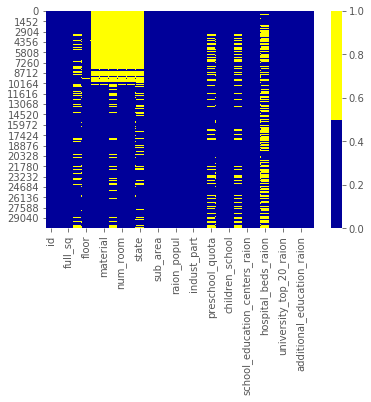

In [43]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [45]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
missing_threshold = .25
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if pct_missing > missing_threshold:
        print('{} - {}%'.format(col, round(pct_missing*100)))

max_floor - 31.0%
material - 31.0%
build_year - 45.0%
num_room - 31.0%
kitch_sq - 31.0%
state - 44.0%
hospital_beds_raion - 47.0%
cafe_sum_500_min_price_avg - 44.0%
cafe_sum_500_max_price_avg - 44.0%
cafe_avg_price_500 - 44.0%


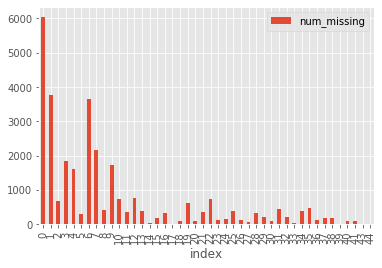

In [47]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        #print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [48]:
#  Uninformative / Repetitive
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()


oil_chemistry_raion: 99.02858%
no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.27187%
no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.16780%
no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

big_road1_1line: 97.43691%
no     29690
yes      781
Name: big_road1_1line, dtype: int64

railroad_1line: 97.06934%
no     29578
yes      893
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.25641%
0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.51101%
0    30322
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.52689%
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosque_count_1000: 98.08342%
0    29887
1      584
Name: mosque_count_1000, dtype: int64

mosque_count_1500: 96.21936%
0    29

In [50]:
# spelling / categories
from nltk.metrics import edit_distance

df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})


df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,torontoo,1,8
1,toronto,0,8
2,tronto,1,8
3,vancouver,8,0
4,vancover,7,1
5,vancouvr,7,1
6,montreal,7,8
7,calgary,7,8


In [51]:
# correct
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex


,city,city_distance_toronto,city_distance_vancouver
0,toronto,1,8
1,toronto,0,8
2,toronto,1,8
3,vancouver,8,0
4,vancouver,7,1
5,vancouver,7,1
6,montreal,7,8
7,calgary,7,8


## MELT
https://towardsdatascience.com/reshape-pandas-dataframe-with-melt-in-python-tutorial-and-visualization-29ec1450bb02

In [4]:
df_wide = pd.DataFrame(
  {"student": ["Andy", "Bernie", "Cindy", "Deb"],
   "school":  ["Z", "Y", "Z", "Y"],
   "english": [10, 100, 1000, 10000],  # eng grades
   "math":    [20, 200, 2000, 20000],  # math grades
   "physics": [30, 300, 3000, 30000]   # physics grades
  }
)
df_wide

,student,school,english,math,physics
0,Andy,Z,10,20,30
1,Bernie,Y,100,200,300
2,Cindy,Z,1000,2000,3000
3,Deb,Y,10000,20000,30000


In [5]:
# melt 1
df_wide.melt(id_vars=["student", "school"],
             var_name="cLaSs",
             value_name="gRaDe")

,student,school,cLaSs,gRaDe
0,Andy,Z,english,10
1,Bernie,Y,english,100
2,Cindy,Z,english,1000
3,Deb,Y,english,10000
4,Andy,Z,math,20
5,Bernie,Y,math,200
6,Cindy,Z,math,2000
7,Deb,Y,math,20000
8,Andy,Z,physics,30
9,Bernie,Y,physics,300


In [6]:
df_wide.melt(id_vars="student", 
             value_vars=["english","math"], 
             var_name="cLaSs", 
             value_name="gRaDe")

,student,cLaSs,gRaDe
0,Andy,english,10
1,Bernie,english,100
2,Cindy,english,1000
3,Deb,english,10000
4,Andy,math,20
5,Bernie,math,200
6,Cindy,math,2000
7,Deb,math,20000


In [7]:
df_wide.melt(id_vars="student",
             var_name="cLaSs",
             value_name="gRaDe")

,student,cLaSs,gRaDe
0,Andy,school,Z
1,Bernie,school,Y
2,Cindy,school,Z
3,Deb,school,Y
4,Andy,english,10
5,Bernie,english,100
6,Cindy,english,1000
7,Deb,english,10000
8,Andy,math,20
9,Bernie,math,200


## Part 4 - Great Expectations  

In [32]:
# GE Dataframes are a superset of pandas dataframes
df_ge = ge.dataset.PandasDataset(df)

In [33]:
# more to come  

# Done